# US Company Bankruptcy Prediction Dataset

Data available at: https://github.com/sowide/bankruptcy_dataset

Lombardo, G., Pellegrino, M., Adosoglou, G., Cagnoni, S., Pardalos, P. M., & Poggi, A. (2022). Machine learning for bankruptcy prediction in the American stock market: dataset and benchmarks. Future Internet, 14(8), 244.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./american_bankruptcy.csv')

In [3]:
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [4]:
df['status_label'].value_counts()

status_label
alive     73462
failed     5220
Name: count, dtype: int64

In [5]:

admission_with_ones = df[df['status_label'] == 'failed']['company_name'].nunique()

admission_without_ones = df.groupby('status_label')['company_name'].apply(lambda x: (x != 'failed').all()).sum()

print(f"Admisiones con al menos un 1 en 'individualMRGerm': {admission_with_ones}")
print(f"Admisiones con valores distintos a 1 en 'individualMRGerm': {admission_without_ones}")

Admisiones con al menos un 1 en 'individualMRGerm': 609
Admisiones con valores distintos a 1 en 'individualMRGerm': 2


## Rename the variables

In [6]:
column_rename_map = {
    'company_name': 'company',  
    'status_label': 'status', 
    'year': 'year',  
    'X1': 'Current_Assets', 
    'X2': 'COGS', 
    'X3': 'Depreciation_Amortization',
    'X4': 'EBITDA',
    'X5': 'Inventory',
    'X6': 'Net_Income',
    'X7': 'Receivables',
    'X8': 'Market_Value',
    'X9': 'Net_Sales',
    'X10': 'Total_Assets',
    'X11': 'Long-term_Debt',
    'X12': 'EBIT',
    'X13': 'Gross_Profit',
    'X14': 'Current_Liabilities',
    'X15': 'Retained_Earnings',
    'X16': 'Total_Revenue',
    'X17': 'Total_Liabilities',  
    'X18': 'Operating_Expenses' 
}

# Rename the columns using the dictionary
df.rename(columns=column_rename_map, inplace=True)

In [7]:
df

,company,status,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Receivables,...,Net_Sales,Total_Assets,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [8]:
df.describe()

,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Receivables,Market_Value,Net_Sales,Total_Assets,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


# Nan values

In [9]:
df.isna().sum()

company                      0
status                       0
year                         0
Current_Assets               0
COGS                         0
Depreciation_Amortization    0
EBITDA                       0
Inventory                    0
Net_Income                   0
Receivables                  0
Market_Value                 0
Net_Sales                    0
Total_Assets                 0
Long-term_Debt               0
EBIT                         0
Gross_Profit                 0
Current_Liabilities          0
Retained_Earnings            0
Total_Revenue                0
Total_Liabilities            0
Operating_Expenses           0
dtype: int64

## Create  binary target 

In [10]:
df['status'] = df['status'].apply(lambda x: 1 if x == 'failed' else 0)

In [11]:
df

,company,status,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Receivables,...,Net_Sales,Total_Assets,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses
0,C_1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,0,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,0,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,0,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,0,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


## Remove the companies that have less than 5 time steps (years) of information

In [12]:
company_counts = df['company'].value_counts()

companies_with_multiple_rows = company_counts[company_counts >= 5].index

df_filtered = df[df['company'].isin(companies_with_multiple_rows)]

In [13]:
df_filtered

,company,status,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Receivables,...,Net_Sales,Total_Assets,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses
0,C_1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,0,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,0,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,0,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,0,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [14]:
df_filtered['company'].unique().shape

(5873,)

## Imbalance

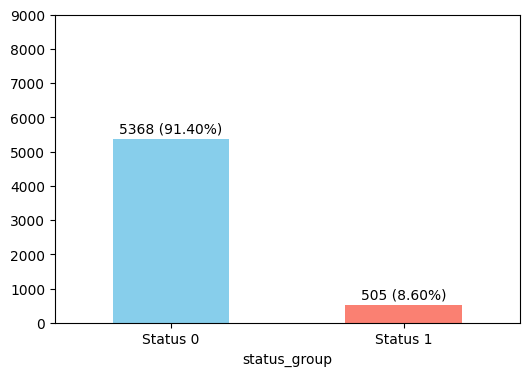

In [15]:
df = df_filtered.copy()

# Group by 'company' and check if any 'status' value is 1, otherwise mark 0
df['status_group'] = df.groupby('company')['status'].transform(lambda x: 1 if x.any() else 0)

# Drop duplicates to avoid counting multiple rows of the same company
status_group_per_company = df[['company', 'status_group']].drop_duplicates()

# Count the occurrences of '0' and '1' in the 'status_group' for each company
status_counts = status_group_per_company['status_group'].value_counts()

# Calculate the percentage for each status
status_percentage = (status_counts / status_counts.sum()) * 100

# Plot the results
plt.figure(figsize=(6, 4))
ax = status_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add percentages on top of the bars
for i, v in enumerate(status_counts):
    ax.text(i, v + 100, f'{v} ({status_percentage[i]:.2f}%)', ha='center', va='bottom')

plt.xticks([0, 1], ['Status 0', 'Status 1'], rotation=0)
plt.ylim(0, 9000)
plt.show()


## Select a temporal window

In [16]:
n_time_steps = 10  # Desired number of time steps per client

final_rows = []  

df = df_filtered.copy()  

# Iterate through each unique client
for company in df['company'].unique():
    # Filter the data for the specific client
    company_data = df[df['company'] == company].head(n_time_steps)  # Select the first n_time_steps rows for the client
    num_rows = len(company_data)
    
    # If the client has fewer than n_time_steps rows, add rows with flag values (666)
    if num_rows < n_time_steps:
        # Calculate the number of missing rows
        rows_to_add = n_time_steps - num_rows
        
        # Create additional rows with 666 in all columns, except for 'company' and 'status'
        additional_rows = pd.DataFrame(
            [[company] + [666] * (df.shape[1] - 2) + [666]] * rows_to_add,  # Repeat rows with 666
            columns=df.columns
        )
        additional_rows['company'] = company  # Ensure 'company' column is set correctly
        additional_rows['status'] = 666  # Assign 666 to the 'status' field in the additional rows
        
        # Add the required rows with 666
        company_data = pd.concat([company_data, additional_rows], ignore_index=True)
    
    # Ensure the total number of rows is exactly n_time_steps
    company_data = company_data.head(n_time_steps)  # Keep exactly n_time_steps rows
    
    # Add a 'sampling' column with values from 1 to n_time_steps for each client
    company_data['sampling'] = range(1, len(company_data) + 1)  # From 1 to the number of rows
    
    # Add the processed data for the client to the final list
    final_rows.append(company_data)

# Concatenate all processed rows into a final DataFrame
df_final = pd.concat(final_rows, ignore_index=True)

# Fill any NaN values in the 'status' column with 666
df_final['status'] = df_final['status'].fillna(666).astype(int)


In [17]:
df_final

,company,status,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,Net_Income,Receivables,...,Total_Assets,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses,sampling
0,C_1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1
1,C_1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,2
2,C_1,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,3
3,C_1,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,4
4,C_1,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58725,C_8971,666,666,666.000,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,6
58726,C_8971,666,666,666.000,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,7
58727,C_8971,666,666,666.000,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,8
58728,C_8971,666,666,666.000,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,9


In [18]:
df_final['company'].unique().shape

(5873,)

In [19]:
companies_with_status_1 = df_final[df_final['status'] == 1]

unique_companies = companies_with_status_1['company'].nunique()

print(f"Companies with bankruptancy: {unique_companies}")

Companies with bankruptancy: 505


## Temporal data

In [20]:
temporal_data = df_final.copy()

In [21]:
temporal_data.columns

Index(['company', 'status', 'year', 'Current_Assets', 'COGS',
       'Depreciation_Amortization', 'EBITDA', 'Inventory', 'Net_Income',
       'Receivables', 'Market_Value', 'Net_Sales', 'Total_Assets',
       'Long-term_Debt', 'EBIT', 'Gross_Profit', 'Current_Liabilities',
       'Retained_Earnings', 'Total_Revenue', 'Total_Liabilities',
       'Operating_Expenses', 'sampling'],
      dtype='object')

In [22]:
temporal_data = temporal_data[['company', 'sampling', 'status', 'year', 'Current_Assets', 'COGS',
       'Depreciation_Amortization', 'EBITDA', 'Inventory', 'Net_Income',
       'Receivables', 'Market_Value', 'Net_Sales', 'Total_Assets',
       'Long-term_Debt', 'EBIT', 'Gross_Profit', 'Current_Liabilities',
       'Retained_Earnings', 'Total_Revenue', 'Total_Liabilities',
       'Operating_Expenses']]

temporal_data.to_csv('./bank_data_temporal.csv')

In [23]:
temporal_data

,company,sampling,status,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,Net_Income,...,Net_Sales,Total_Assets,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses
0,C_1,1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,2,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,3,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,4,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,5,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58725,C_8971,6,666,666,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000
58726,C_8971,7,666,666,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000
58727,C_8971,8,666,666,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000
58728,C_8971,9,666,666,666.000,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000


In [24]:
temporal_data = pd.read_csv('bank_data_temporal.csv')

def calculate_days_of_stay_fixed(df):
    results = {}
    for subject_id, group in df.groupby('company'):
        count_non_666 = (group['status'] != 666).sum()  # Count rows where 'status' is not 666
        results[subject_id] = count_non_666
    return results

def calculate_days_to_positive_fixed(df):
    results = {}
    for subject_id, group in df.groupby('company'):
        if 1 in group['status'].values:
            first_positive_idx = group[group['status'] == 1].index[0]
            count_to_positive = (group.index <= first_positive_idx).sum()
        else:
            count_to_positive = 0
        results[subject_id] = count_to_positive
    return results

days_of_stay = calculate_days_of_stay_fixed(temporal_data)
days_to_positive = calculate_days_to_positive_fixed(temporal_data)

temporal_data['DaysOfStay'] = temporal_data['company'].map(days_of_stay)
temporal_data['DaysToPositive'] = temporal_data['company'].map(days_to_positive)

temporal_data.rename(columns={'company': 'Admissiondboid'}, inplace=True)
temporal_data.rename(columns={'sampling': 'dayToDone'}, inplace=True)
temporal_data.rename(columns={'status': 'individualMRGerm'}, inplace=True)

temporal_data.to_csv('bank_data_preprocessed.csv', index=False)

In [25]:
temporal_data

,Unnamed: 0,Admissiondboid,dayToDone,individualMRGerm,year,Current_Assets,COGS,Depreciation_Amortization,EBITDA,Inventory,...,Long-term_Debt,EBIT,Gross_Profit,Current_Liabilities,Retained_Earnings,Total_Revenue,Total_Liabilities,Operating_Expenses,DaysOfStay,DaysToPositive
0,0,C_1,1,0,1999,511.267,833.107,18.373,89.031,336.018,...,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,10,0
1,1,C_1,2,0,2000,485.856,713.811,18.577,64.367,320.590,...,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,10,0
2,2,C_1,3,0,2001,436.656,526.477,22.496,27.207,286.588,...,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,10,0
3,3,C_1,4,0,2002,396.412,496.747,27.172,30.745,259.954,...,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,10,0
4,4,C_1,5,0,2003,432.204,523.302,26.680,47.491,247.245,...,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58725,58725,C_8971,6,666,666,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,5,0
58726,58726,C_8971,7,666,666,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,5,0
58727,58727,C_8971,8,666,666,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,5,0
58728,58728,C_8971,9,666,666,666.000,666.000,666.000,666.000,666.000,...,666.000,666.000,666.000,666.000,666.000,666.000,666.000,666.000,5,0


In [26]:
temporal_data.columns

Index(['Unnamed: 0', 'Admissiondboid', 'dayToDone', 'individualMRGerm', 'year',
       'Current_Assets', 'COGS', 'Depreciation_Amortization', 'EBITDA',
       'Inventory', 'Net_Income', 'Receivables', 'Market_Value', 'Net_Sales',
       'Total_Assets', 'Long-term_Debt', 'EBIT', 'Gross_Profit',
       'Current_Liabilities', 'Retained_Earnings', 'Total_Revenue',
       'Total_Liabilities', 'Operating_Expenses', 'DaysOfStay',
       'DaysToPositive'],
      dtype='object')

In [27]:
temporal_data['Admissiondboid'].unique().shape

(5873,)